Video 加工

In [5]:
from IPython.display import Video

In [26]:
source = "./ONE OK ROCK_The Way Back.mp4"
tmp_dir = './data/tmp_dir/'
os.makedirs(tmp_dir, exist_ok=True)

In [ ]:
Video(source)

In [59]:
import pandas as pd
import numpy as np
import datetime
import cv2, io, os
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [145]:
cap = cv2.VideoCapture(source)

frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
FPS = cap.get(cv2.CAP_PROP_FPS)
print('frame', frames)
print(' (%d,%d)' % (width, height))
print('FPS', FPS)
cap.release()

frame 5442
 (720,480)
FPS 29.97002997002997


In [12]:
area = [[0, 0], [400, 300]]

In [31]:
check_arr = (np.array(range(10,60,10)) * FPS).astype(int)
print(check_arr)
len(check_arr)

[ 299  599  899 1198 1498]


5

In [25]:
cap = cv2.VideoCapture(source)
for fno in range(frames):
    is_ok, frame = cap.read()
    if fno in check_arr:
        gray_full = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_area = gray_full[area[0][1]:area[1][1], area[0][0]:area[1][0]]
        cv2.imwrite(f'{tmp_dir}/{fno:06d}_gray.jpg', gray_area)
cap.release()

True
True
True
True


In [ ]:
n = 600
x0 = np.append([0], np.random.randint(-5, 5, n-1)).cumsum()
y0 = np.linspace(0, n-1, num=n)

In [163]:
df = pd.DataFrame({"x": x0, "y": y0})
df["abs_t"] = np.linspace(0, 0.025*(len(x0)-1), len(x0))

df_obj = pd.DataFrame({"x": [], "y": [], "obj_idx": []})

In [164]:
df.head(3)

,x,y,abs_t
0,0,0.0,0.000
1,0,1.0,0.025
2,-4,2.0,0.050


In [165]:
def make_trend_all(ego_xy, obj_):
    """トレンド生成"""
    x0, y0 = ego_xy.values.T
    
    fig, ax = plt.subplots(1, 1, figsize=(2, 6))
    ax.plot(x0, y0)
    ax.set_xlabel("x", size=10)
    ax.set_ylabel("y(t)", size=10)
    ax.grid()
    return fig, ax

In [189]:
def make_trend_frame(fno, fig, ax):
    """対象フレームのトレンド生成
    一枚ずつ作成ではなく、長いグラフ(画像)を切って使う？ (軸も切れるけど)
    ⇒ 切る位置がシビアなので、長いグラフ案は却下。
    イメージだけ作っておいて、axhlineとxlim,ylimで表示位置確定させる
    """
    hline = fno * 1 / out_fps    # 恐らく時間軸
    ymin = hline - 20 if hline > 20 else 0
    ymax = ymin + 40
    ax.axhline(hline, color='black', linestyle="dotted")
    ax.set_ylim(ymin, ymax)    
    fig.tight_layout()

    fig.canvas.draw()    # Figure をレンダリング
    data = np.array(fig.canvas.renderer.buffer_rgba())    # 画像をバイト列で取得
    w, h = fig.canvas.get_width_height()    # 画像の大きさを取得
    plt.close()
    return data

(600, 200, 4)


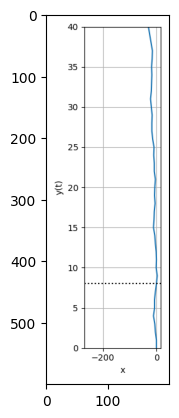

In [190]:
fig, ax = make_trend_all(df[["x", "y"]], [])
fno = 200
data = make_trend_frame(fno, fig, ax)
print(data.shape)
plt.imshow(data)
plt.show()

0.025sec = 40FPS になってしまうので、ファイルサイズも考慮して間引く

In [148]:
2/FPS

0.06673333333333334

In [ ]:
ax0.set_xlim

In [149]:
out_fps = FPS / 2    # 1frame跳ばし
div_t = 1 / out_fps    # 2frameずつ(=1frame跳ばし)の時間
for fno in range(30):
    if fno % 2 == 0:
        print(fno, div_t * fno)

0 0.0
2 0.13346666666666668
4 0.26693333333333336
6 0.40040000000000003
8 0.5338666666666667
10 0.6673333333333333
12 0.8008000000000001
14 0.9342666666666668
16 1.0677333333333334
18 1.2012
20 1.3346666666666667
22 1.4681333333333335
24 1.6016000000000001
26 1.7350666666666668
28 1.8685333333333336


In [139]:
FPS/out_fps

1.2

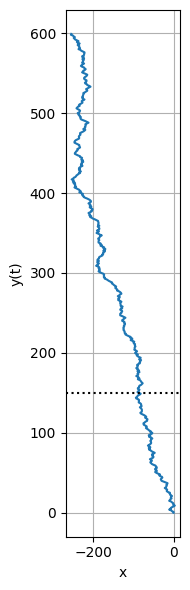

In [152]:
fig, ax0 = plt.subplots(1, 1, figsize=(2, 6))
# fig = plt.figure(figsize=(3, 3))
# ax0 = fig.add_subplot(111)
ax0.plot(x0, y0)
ax0.axhline(150, color='black', linestyle="dotted")
ax0.set_xlabel("x", size=10)
ax0.set_ylabel("y(t)", size=10)
# ax0.axis('square')
ax0.grid()
fig.tight_layout()
plt.show()

In [124]:
# buf = io.BytesIO()    # メモリ上への仮保管先を生成
# fig.savefig(buf, format='png', dpi=64)    # メモリ上に保存
# buf.close()

fname = "./data/buf.png"
fig.savefig(fname)    # ファイルに保存
img = plt.imread(fname)
print(img.shape)

In [153]:
# https://pystyle.info/matplotlib-convert-figure-to-bytes-and-base64/
# https://water2litter.net/rum/post/python_matplotlib_convert2array/
fig.canvas.draw()    # Figure をレンダリングする。
data = np.array(fig.canvas.renderer.buffer_rgba())    # 画像をバイト列で取得する。
w, h = fig.canvas.get_width_height()    # 画像の大きさを取得する。
print(w, h)
# img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGRA)    # RGB を BGR に変更する。
# plt.close()

200 600


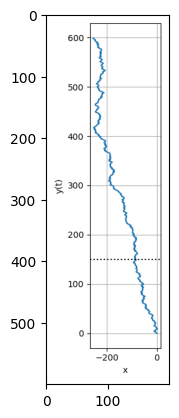

In [154]:
plt.imshow(data)
plt.show()

In [70]:
rescale.shape

(300, 400, 3)

In [103]:
rescale[:3]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [53]:
cap = cv2.VideoCapture(source)

fourcc = cv2.VideoWriter_fourcc('m','p','4', 'v')
writer = cv2.VideoWriter(f'./data/ImgVideo.mp4', fourcc, FPS, tuple(area[1]))

for fno in tqdm(range(frames)[:300]):
    is_ok, frame = cap.read()
    if not is_ok: break
    rescale = frame[area[0][1]:area[1][1], area[0][0]:area[1][0]]
    writer.write(rescale)
writer.release()
cap.release()

100% 300/300 [00:00<00:00, 1356.50it/s]


In [17]:
180*FPS

5394.605394605394